In [33]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [34]:
# training svm model on 'temp_training_dataset' csv file
df = pd.read_csv('../output/training_dataset_with_new_rows.csv')
df

,Company Name,Similar Name,Target,Simple Ratio,partial Ratio,Token Sort Ratio,Token Set Ratio,word match percentage,first word match,last word match,character_matching_percentage,cosine similarity
0,HARRIS COUNTY CSCD,HARRIS COUNTY,1,84,100,84,100,66.666667,True,False,72.222222,0.816497
1,HARRIS COUNTY CSCD,HARRIS COUNTY ITC,1,86,94,74,87,50.000000,True,False,83.333333,0.666667
2,RICHLAND COUNTY EMERGENCY SERVICES,LANDER COUNTY EMERGENCY SERVICES,0,91,97,91,91,60.000000,False,True,2.941176,0.750000
3,CS RECURSOS GEOTERMICO ICE,CS RECURSOS GEOTAARMICO ICE,1,94,92,94,94,60.000000,True,True,59.259259,0.750000
4,HARRIS COUNTY ITC,HARRIS COUNTY,1,90,100,87,100,66.666667,True,False,82.352941,0.816497
...,...,...,...,...,...,...,...,...,...,...,...,...
616,CHIFENG JILONG GOLD MINING,SHANGHAI AUTOMOTIVE INDUSTRY DEVELOPING,0,37,42,40,40,0.000000,False,False,5.128205,0.000000
617,FEDERAL AUTHORITY FOR IDENTITY AND CITIZENSHIP...,TOSHIBA ELEVATOR AND BUILDING SYSTEMS,0,37,41,41,41,9.090909,False,False,2.000000,0.169031
618,POSTFINANCE AG,SERVICIO NACIONAL MIGRACION,0,34,43,29,29,0.000000,False,False,0.000000,0.000000
619,VODACOM PTY,36TH DISTRICT COURT,0,27,38,33,33,0.000000,False,False,0.000000,0.000000


In [35]:
# Convert True/False column to numerical values
df['first word match'] = df['first word match'].astype(int)
df['last word match'] = df['last word match'].astype(int)

In [36]:
# confirming the dimensions of the dataset
print(df.shape)

(621, 12)


In [37]:
df

,Company Name,Similar Name,Target,Simple Ratio,partial Ratio,Token Sort Ratio,Token Set Ratio,word match percentage,first word match,last word match,character_matching_percentage,cosine similarity
0,HARRIS COUNTY CSCD,HARRIS COUNTY,1,84,100,84,100,66.666667,1,0,72.222222,0.816497
1,HARRIS COUNTY CSCD,HARRIS COUNTY ITC,1,86,94,74,87,50.000000,1,0,83.333333,0.666667
2,RICHLAND COUNTY EMERGENCY SERVICES,LANDER COUNTY EMERGENCY SERVICES,0,91,97,91,91,60.000000,0,1,2.941176,0.750000
3,CS RECURSOS GEOTERMICO ICE,CS RECURSOS GEOTAARMICO ICE,1,94,92,94,94,60.000000,1,1,59.259259,0.750000
4,HARRIS COUNTY ITC,HARRIS COUNTY,1,90,100,87,100,66.666667,1,0,82.352941,0.816497
...,...,...,...,...,...,...,...,...,...,...,...,...
616,CHIFENG JILONG GOLD MINING,SHANGHAI AUTOMOTIVE INDUSTRY DEVELOPING,0,37,42,40,40,0.000000,0,0,5.128205,0.000000
617,FEDERAL AUTHORITY FOR IDENTITY AND CITIZENSHIP...,TOSHIBA ELEVATOR AND BUILDING SYSTEMS,0,37,41,41,41,9.090909,0,0,2.000000,0.169031
618,POSTFINANCE AG,SERVICIO NACIONAL MIGRACION,0,34,43,29,29,0.000000,0,0,0.000000,0.000000
619,VODACOM PTY,36TH DISTRICT COURT,0,27,38,33,33,0.000000,0,0,0.000000,0.000000


In [38]:
# Let’s also look at the data types of each attribute
print(df.dtypes)

Company Name                      object
Similar Name                      object
Target                            object
Simple Ratio                       int64
partial Ratio                      int64
Token Sort Ratio                   int64
Token Set Ratio                    int64
word match percentage            float64
first word match                   int32
last word match                    int32
character_matching_percentage    float64
cosine similarity                float64
dtype: object


In [39]:
print(df.describe())

       Simple Ratio  partial Ratio  Token Sort Ratio  Token Set Ratio  \
count    621.000000     621.000000        621.000000       621.000000   
mean      69.993559      82.611916         69.027375        79.544283   
std       25.886164      22.252998         25.697199        26.496805   
min        0.000000       0.000000          0.000000         0.000000   
25%       52.000000      73.000000         49.000000        67.000000   
50%       76.000000      92.000000         75.000000        92.000000   
75%       93.000000     100.000000         92.000000       100.000000   
max      100.000000     100.000000        100.000000       100.000000   

       word match percentage  first word match  last word match  \
count             621.000000        621.000000       621.000000   
mean               47.877620          0.731079         0.330113   
std                33.914266          0.443756         0.470633   
min                 0.000000          0.000000         0.000000   
25%    

In [40]:
# class distribution : same:1 , different:0
print(df.groupby('Target').size())
# means we must have same no. of records count in both categories (more balanced model created)
# diff. between same / diff record count must be minimum

Target
0             365
1             244
different      11
same            1
dtype: int64


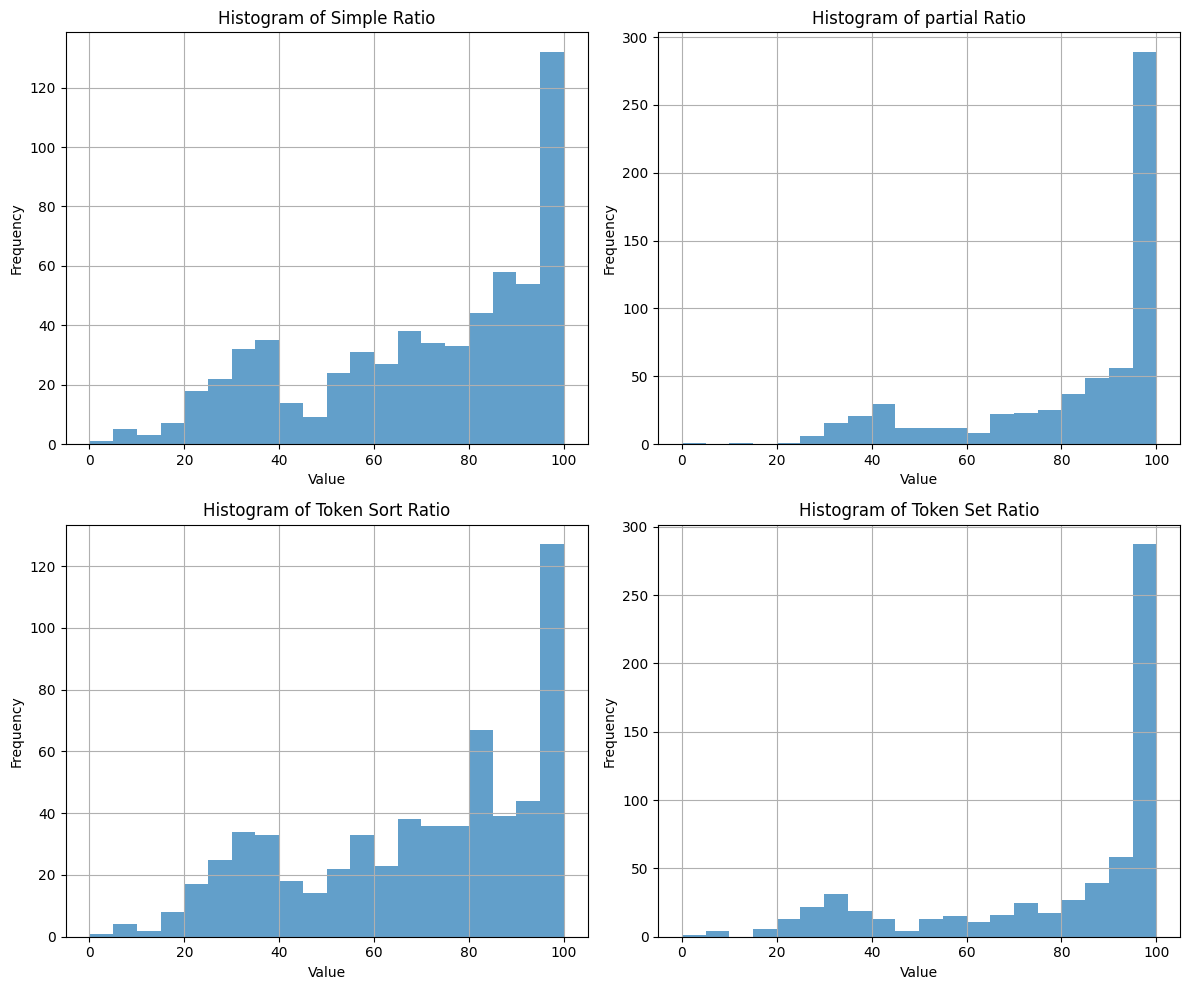

In [41]:
# visualizations of individual attributes
import matplotlib.pyplot as plt

# Assuming 'Simple Ratio', 'Partial Ratio', 'Token Sort Ratio', 'Token Set Ratio' are the columns of interest
ratio_columns = ['Simple Ratio', 'partial Ratio', 'Token Sort Ratio', 'Token Set Ratio']

# Create separate histogram plots for each ratio column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(ratio_columns):
    axes[i].hist(df[column], bins=20, alpha=0.7)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Validation of Dataset: 
#### good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [42]:
df.columns

Index(['Company Name', 'Similar Name', 'Target', 'Simple Ratio',
       'partial Ratio', 'Token Sort Ratio', 'Token Set Ratio',
       'word match percentage', 'first word match', 'last word match',
       'character_matching_percentage', 'cosine similarity'],
      dtype='object')

In [43]:
rows_with_nan = df[df.isna().any(axis=1)]

print("Rows with NaN values:")
print(rows_with_nan)

Rows with NaN values:
Empty DataFrame
Columns: [Company Name, Similar Name, Target, Simple Ratio, partial Ratio, Token Sort Ratio, Token Set Ratio, word match percentage, first word match, last word match, character_matching_percentage, cosine similarity]
Index: []


In [44]:
# for training model, we need to split the dataframe and also its features
from sklearn.model_selection import train_test_split
# Separate features and target variable
features = [ 'Simple Ratio','first word match', 'Token Sort Ratio', 'Token Set Ratio', 'character_matching_percentage', 'cosine similarity']
xn = df[features] #independent features (input columns)
yn = df['Target'] #dependent feature (output column)

Xn_train, Xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size=0.2, random_state=42)

### Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report
 
classifier= LogisticRegression(random_state=0)  
classifier.fit(Xn_train, yn_train)  

# Make predictions
yn_pred = classifier.predict(Xn_test)

# Evaluate the model
accuracy = accuracy_score(yn_test, yn_pred)
report = classification_report(yn_test, yn_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.672
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.62      0.68        71
           1       0.60      0.78      0.68        51
  different        0.00      0.00      0.00         3

    accuracy                           0.67       125
   macro avg       0.45      0.47      0.45       125
weighted avg       0.67      0.67      0.66       125



##### Read for Understanding Theory : 
Trying different kernels in Support Vector Machines (SVMs) involves using various mathematical functions to transform input data into a higher-dimensional space, aiming to find the optimal decision boundary for classification tasks.
1. Radial Basis Function (RBF) Kernel:
RBF kernel is often effective and commonly used due to its flexibility in capturing nonlinear relationships. Try using it instead of the linear kernel and evaluate its impact on accuracy.
2. Polynomial Kernel:
Another nonlinear kernel option is the polynomial kernel. It captures polynomial relationships between features. You can try this kernel as well.
3. Customizing Kernel Parameters:
For both RBF and polynomial kernels, there are additional parameters you can tune, such as gamma for RBF or degree for polynomial kernels. Trying different values for these parameters might further improve accuracy.
Decreasing Gamma, Increasing Accuracy: In your case, decreasing the gamma value led to an increase in accuracy. This behavior often signifies that the previous gamma value might have caused the model to overfit the training data, impacting its performance on unseen or test data. Lower gamma values tend to generalize better to unseen data, hence improving accuracy.

### Try out trained model on New record

In [46]:
pip install fuzz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import pandas as pd
from theFuzz import fuzz

# give 'Company Name' and 'Similar Name' as input => we will find all the fuzzy ratios => this dataframe of ratios passed to a trained SVM model => get the target ouptut
# Sample function to create a single record DataFrame with similarity ratios
def create_single_record(company_name, similar_name):
    data = {
        # 'Company Name': [company_name],
        # 'Similar Name': [similar_name],
        'Simple Ratio': [fuzz.ratio(company_name, similar_name)],
        'partial Ratio': [fuzz.partial_ratio(company_name, similar_name)],
        'Token Sort Ratio': [fuzz.token_sort_ratio(company_name, similar_name)],
        'Token Set Ratio': [fuzz.token_set_ratio(company_name, similar_name)]
    }

    single_record_df = pd.DataFrame(data)
    return single_record_df

# Usage example:
single_record = create_single_record('HARRIS COUNTY CSCD', 'HARRIS COUNTY')
single_record


ModuleNotFoundError: No module named 'theFuzz'

In [ ]:
# Make predictions on the single_record DataFrame directly without encoding
predicted_target = svm_model_rbf_custom.predict(single_record)

# Print the predicted target
print("Predicted Target:", predicted_target)

# Convert the predictions to match your specified output format
if predicted_target == 0:
    print("Predicted Target: No Match")
elif predicted_target == 1:
    print("Predicted Target: Matched")
else:
    print("Unexpected Prediction Value")

Predicted Target: [1]
Predicted Target: Matched
